<a href="https://colab.research.google.com/github/cabreratr/hacking-civico/blob/master/proyecto/proyecto-hacking-civico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Hacking - Cívico: Muerte materna en México

La base de datos contiene información de los casos de defunción relacionados con la mortalidad materna en el periodo 2002 - 2018, proporcionados por la Secretaría de Salud.

Se desea analizar el comportamiento de los fallecimientos de las mujeres que se encuentraban embarazadas, analizando a su vez el caso del estado de Chiapas, ya que es un estado que por su tamaño y su situación geográfica a veces presenta un dificil acceso a las unidades de salud.

Se buscará responder a las siguientes preguntas:
*    ¿En qué estados se presenta mayormente los casos de muertes maternas?
*    ¿Cuál es la edad de las madres? 
*    ¿Cuales son las principales causas de las muertes maternas? 
*    En el estado de Chiapas ¿En que sitios ocurrió principalmente los fallecimientos?


In [6]:
# Para descargar el conjunto de datos
!wget http://www.dgis.salud.gob.mx/descargas/datosabiertos/muerteMaterna/mortalidad_materna.zip?V=1.1.3

# Descomprimimos ambas carpetas y movemos archivos
!unzip mortalidad_materna.zip?V=1.1.3
!mv ./mortalidad_materna/*.xlsx .
!mv *mortalidad_materna.csv mortalidad_materna.csv


--2020-10-06 18:08:05--  http://www.dgis.salud.gob.mx/descargas/datosabiertos/muerteMaterna/mortalidad_materna.zip?V=1.1.3
Resolving www.dgis.salud.gob.mx (www.dgis.salud.gob.mx)... failed: No address associated with hostname.
wget: unable to resolve host address ‘www.dgis.salud.gob.mx’
Archive:  mortalidad_materna.zip?V=1.1.3
  inflating: Mortalidad_Materna.csv  
mv: cannot stat './mortalidad_materna/*.xlsx': No such file or directory
mv: cannot stat '*mortalidad_materna.csv': No such file or directory


In [7]:
# Eliminamos las carpetas comprimidas
!rm -rf mortalidad_materna
!rm mortalidad_materna.zip?V=1.1.3

In [1]:
#importación de librerias
import statistics
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns

In [9]:
# Especificamos el nombre del archivo por abrir
nombre_archivo = 'Mortalidad_Materna.csv'

# Utilizamos la función de Pandas para cargar un archivo CSV
data = pd.read_csv(nombre_archivo, encoding='latin-1')

In [14]:
data.head()

,año_de_nacimiento,mes_de_nacimiento,descripción_del_mes_de_nacimiento,día_de_nacimiento,edad_cumplida,estado_conyugal,descripción_del_estado_conyugal,entidad_de_residencia,descripción_de_entidad_de_residencia,municipio_de_residencia,descripción_del_municipio_de_residencia,localidad_de_residencia,descripción_de_la_localidad_de_residencia,tamaño_de_localidad,descripción_del_tamaño_de_localidad,ocupación_habitual,descripción_de_la_ocupación_habitual,escolaridad,descripción_de_la_escolaridad,derechohabiencia,descripción_de_la_derechohabiencia,entidad_de_ocurrencia,descripción_de_la_entidad_de_ocurrencia,municipio_de_ocurrencia,descripción_del_municipio_de_ocurrencia,localidad_de_ocurrencia,descrición_de_la_localidad_de,sitio_donde_ocurrio_la_defunción,descripción_del_sitio_donde_ocurrio_la_defunción,año_de_la_defunción,mes_de_la_defunción,descripción_del_mes_de_la_defunción,día_de_la_defunción,hora_de_la_defunción,minutos_de_la_defunción,asistencia_médica,descripción_de_la_asistencia_médica,causa_cie_a_cuatro_dígitos,descripción_de_la_causa_cie,quien_certificó,descripción_de_quien_certificó,entidad_de_registro,descripción_de_la_entidad_de_registro,municipio_de_registro,descripción_del_municipio_de_registro,año_de_registro,mes_de_registro,descripción_del_mes_de_registro,día_de_registro,año_de_la_certificación,mes_de_la_certificación,descripción_del_mes_de_la_certificación,día_de_la_certificación,año_de_la_base_de_datos,razón_de_mortalidad_materna,descripción_de_la_razón_de_mortalidad_materna
0,0,0,NO ESPECIFICADO,0,25,5,CASADO,10,DURANGO,35,035 TEPEHUANES,38,100350038 EL DORADOR (EL DORADO),1,1 A 999 HABITANTES,0,NO ESPECIFICADO,3,PRIMARIA COMPLETA,0,NO ESPECIFICADA,10,DURANGO,35,035 TEPEHUANES,38,100350038 EL DORADOR (EL DORADO),12,OTRO LUGAR,1964,5,MAYO,2,13,0,0,NO ESPECIFICADO,O759,O759 COMPLICACIÓN NO ESPECIFICADA DEL TRABAJO...,0,NO ESPECIFICADO,10,DURANGO,35,035 TEPEHUANES,2002,8,AGOSTO,25,0,0,NO ESPECIFICADO,0,2002,1,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...
1,1965,4,ABRIL,29,37,4,UNION LIBRE,30,VERACRUZ DE IGNACIO DE LA LLAVE,87,087 XALAPA,1,300870001 XALAPA-ENRÍQUEZ,14,250000 A 499999 HABITANTES,2,NO OCUPADOS,2,PRIMARIA INCOMPLETA,1,NINGUNA,30,VERACRUZ DE IGNACIO DE LA LLAVE,87,087 XALAPA,0,300870000 NO ESPECIFICADA,8,OTRA UNIDAD PUBLICA,1965,4,ABRIL,8,15,0,1,CON ATENCION MEDICA,O622,O622 OTRAS INERCIAS UTERINAS,3,OTRO MEDICO,30,VERACRUZ DE IGNACIO DE LA LLAVE,87,087 XALAPA,2002,4,ABRIL,8,0,0,NO ESPECIFICADO,0,2002,1,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...
2,0,0,NO ESPECIFICADO,0,33,5,CASADO,10,DURANGO,12,012 LERDO,137,100120137 LA GOMA,2,1000 A 1999 HABITANTES,0,NO ESPECIFICADO,0,NO ESPECIFICADA,0,NO ESPECIFICADA,10,DURANGO,12,012 LERDO,22,100120022 JUAN E. GARCÍA,0,SE IGNORA,1968,1,ENERO,5,99,99,0,NO ESPECIFICADO,O759,O759 COMPLICACIÓN NO ESPECIFICADA DEL TRABAJO...,3,OTRO MEDICO,10,DURANGO,12,012 LERDO,2002,9,SEPTIEMBRE,18,0,0,NO ESPECIFICADO,0,2002,1,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...
3,1939,0,NO ESPECIFICADO,0,35,5,CASADO,12,GUERRERO,47,047 PEDRO ASCENCIO ALQUISIRAS,35,120470035 RINCÓN DE JUMAPA,1,1 A 999 HABITANTES,2,NO OCUPADOS,3,PRIMARIA COMPLETA,1,NINGUNA,12,GUERRERO,47,047 PEDRO ASCENCIO ALQUISIRAS,35,120470035 RINCÓN DE JUMAPA,11,HOGAR,1974,6,JUNIO,20,4,0,2,SIN ATENCION MEDICA,O998,O998 OTRAS ENFERMEDADES ESPECIFICADAS Y AFECC...,3,OTRO MEDICO,12,GUERRERO,47,047 PEDRO ASCENCIO ALQUISIRAS,2002,10,OCTUBRE,29,0,0,NO ESPECIFICADO,0,2002,1,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...
4,1945,0,NO ESPECIFICADO,0,30,5,CASADO,10,DURANGO,4,004 CUENCAME,21,100040021 12 DE DICIEMBRE (SOMBRERETILLO),1,1 A 999 HABITANTES,2,NO OCUPADOS,2,PRIMARIA INCOMPLETA,1,NINGUNA,5,COAHUILA DE ZARAGOZA,35,035 TORREON,1,050350001 TORREÓN,9,UNIDAD MEDICA PRIVADA,1975,2,FEBRERO,16,16,0,1,CON ATENCION MEDICA,O441,O441 PLACENTA PREVIA CON HEMORRAGIA,3,OTRO MEDICO,10,DURANGO,4,004 CUENCAME,2002,10,OCTUBRE,0,0,0,NO ESPECIFICADO,0,2002,1,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...


In [13]:
# limpieza del nombre de las columnas, remover espacios, carácteres especiales y pasar a minúsculas
data.columns = data.columns.str.replace(' ', '_')
data.columns = data.columns.str.replace('.', '')
data.columns = data.columns.str.lower()

In [17]:
# tipos de datos
data.dtypes

año_de_nacimiento                                    int64
mes_de_nacimiento                                    int64
descripción_del_mes_de_nacimiento                   object
día_de_nacimiento                                    int64
edad_cumplida                                        int64
estado_conyugal                                      int64
descripción_del_estado_conyugal                     object
entidad_de_residencia                                int64
descripción_de_entidad_de_residencia                object
municipio_de_residencia                              int64
descripción_del_municipio_de_residencia             object
localidad_de_residencia                              int64
descripción_de_la_localidad_de_residencia           object
tamaño_de_localidad                                  int64
descripción_del_tamaño_de_localidad                 object
ocupación_habitual                                   int64
descripción_de_la_ocupación_habitual                obje

In [24]:
# ¿Cuántos fallecimientos hubieron por edad?
data.groupby('edad_cumplida').edad_cumplida.count()

edad_cumplida
11       1
12       9
13      17
14      77
15     182
16     377
17     500
18     636
19     689
20     784
21     746
22     835
23     845
24     779
25     789
26     781
27     814
28     827
29     843
30     862
31     809
32     821
33     804
34     731
35     773
36     700
37     622
38     544
39     483
40     375
41     286
42     235
43     156
44     104
45      67
46      35
47      29
48      23
49       7
50       8
51       8
52       1
53       3
54       3
55       1
56       2
59       1
65       1
66       1
67       1
70       2
81       1
82       2
86       2
998     24
Name: edad_cumplida, dtype: int64

Las gráficas presentadas no se pudieron realizar con altair, ya que marcaba un error debido a la cantidad de filas de los datos. Por lo que se elaboraron en Excel utilizando tablas dinámicas.
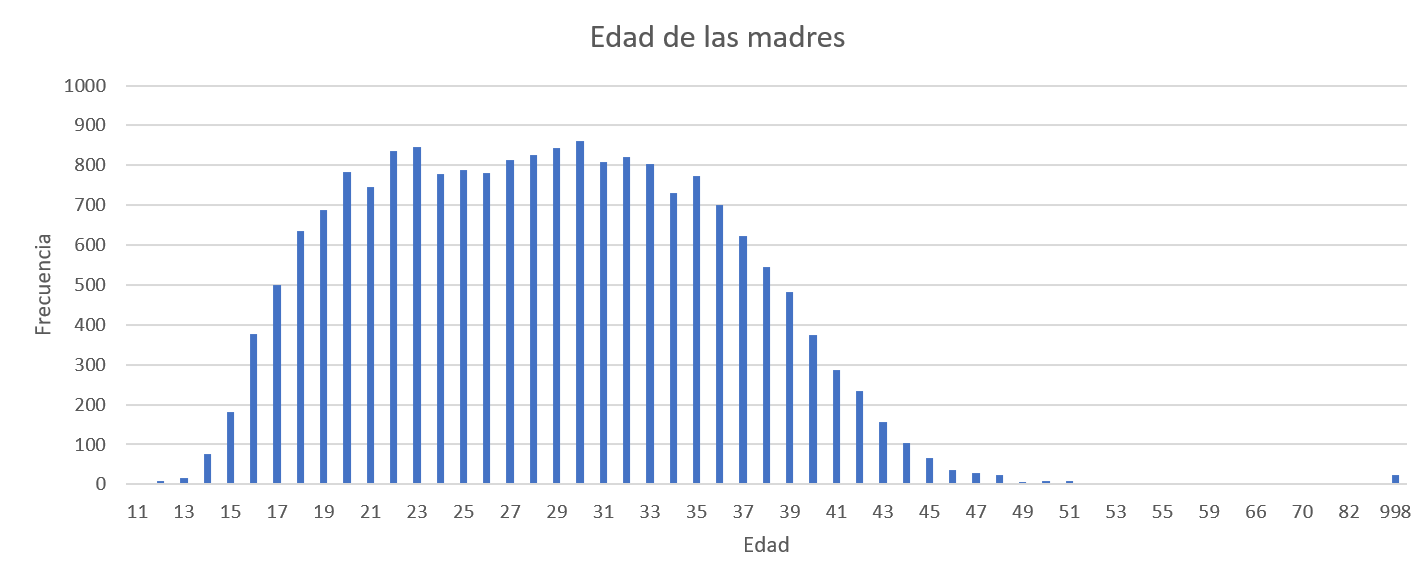

In [26]:
# ¿Cuántos fallecimientos hubieron por entidad?
data.groupby('descripción_de_la_entidad_de_ocurrencia').edad_cumplida.count()

descripción_de_la_entidad_de_ocurrencia
AGUASCALIENTES                      168
BAJA CALIFORNIA                     423
BAJA CALIFORNIA SUR                  73
CAMPECHE                            135
CHIAPAS                            1312
CHIHUAHUA                           730
CIUDAD DE MÉXICO                   2062
COAHUILA DE ZARAGOZA                366
COLIMA                               45
DURANGO                             278
ESTADOS UNIDOS DE NORTEAMÉRICA        3
GUANAJUATO                          776
GUERRERO                           1003
HIDALGO                             432
JALISCO                             963
MICHOACÁN DE OCAMPO                 694
MORELOS                             257
MÉXICO                             2107
NAYARIT                             180
NUEVO LEÓN                          490
OAXACA                              919
PUEBLA                             1113
QUERÉTARO ARTEAGA                   283
QUINTANA ROO                        198


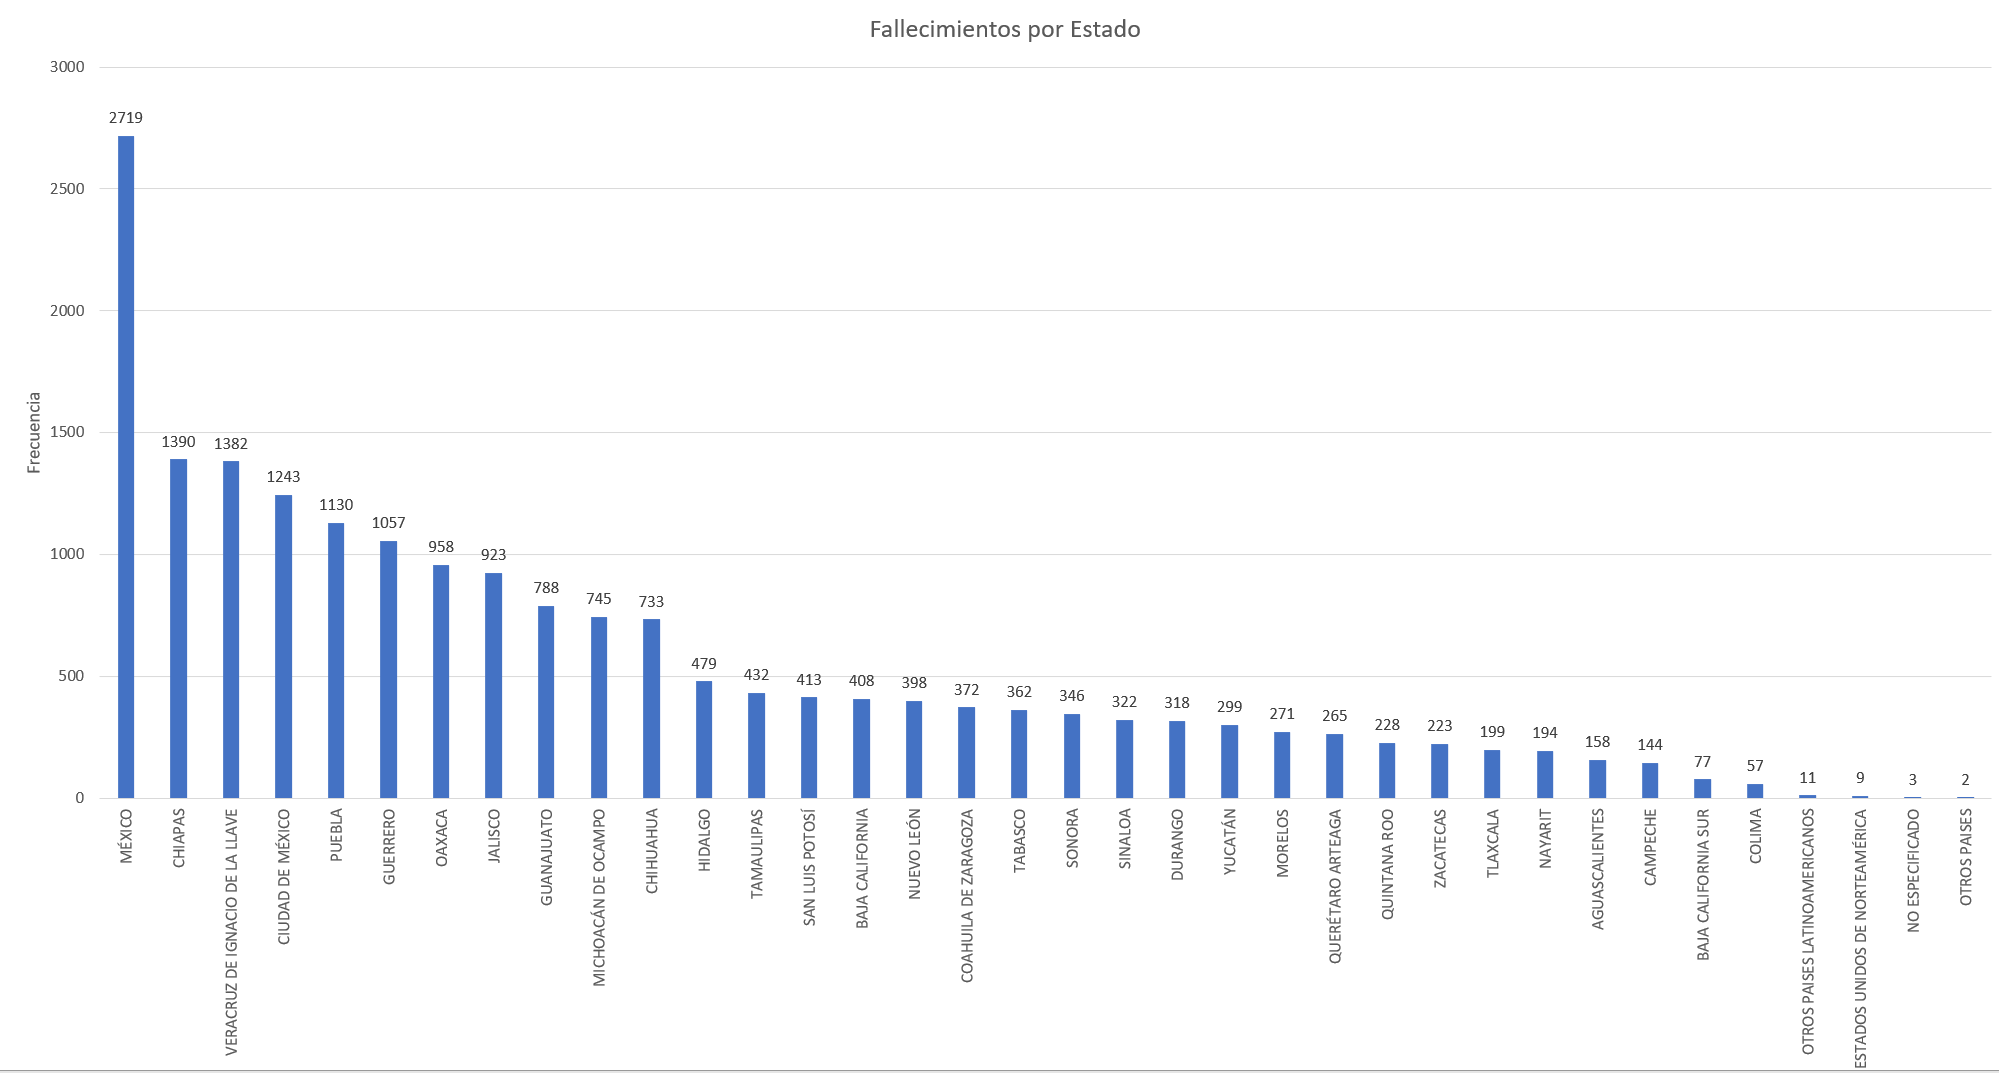

Podemos observar que el estado de México y Chiapas son los estados donde más muertes maternas se presentaron, se puede considerar que Chiapas es un estado que por sus dimensiones y su situación geográfica la atención médica puede resultar de dificel acceso por lo que el riesgo es mayor y como se observa es donde se presenta un alto número de fallecimientos de madres.

In [29]:
#¿Cuál es la proporción de fallecimientos por estado de ocurrencia?
data.descripción_de_la_entidad_de_ocurrencia.value_counts(normalize = True)

MÉXICO                             0.110557
CIUDAD DE MÉXICO                   0.108196
VERACRUZ DE IGNACIO DE LA LLAVE    0.069577
CHIAPAS                            0.068842
PUEBLA                             0.058401
GUERRERO                           0.052629
JALISCO                            0.050530
OAXACA                             0.048221
GUANAJUATO                         0.040718
CHIHUAHUA                          0.038304
MICHOACÁN DE OCAMPO                0.036415
NUEVO LEÓN                         0.025711
TAMAULIPAS                         0.024767
TABASCO                            0.023035
HIDALGO                            0.022668
BAJA CALIFORNIA                    0.022195
SAN LUIS POTOSÍ                    0.021146
COAHUILA DE ZARAGOZA               0.019205
SONORA                             0.017735
YUCATÁN                            0.017630
SINALOA                            0.017263
QUERÉTARO ARTEAGA                  0.014849
DURANGO                         

In [35]:
# Conteo según Escolaridad de las madres fallecidas 
data.descripción_de_la_escolaridad.value_counts()

SECUNDARIA COMPLETA                        4390
PRIMARIA COMPLETA                          3702
PRIMARIA INCOMPLETA                        2768
BACHILLERATO O PREPARATORIA COMPLETA       2297
PROFESIONAL                                1814
NINGUNA                                    1554
SECUNDARIA INCOMPLETA                       970
NO ESPECIFICADA                             802
BACHILLERATO O PREPARATORIA INCOMPLETA      378
SECUNDARIA COMPLETA                         305
SIN ESCOLARIDAD                              33
POSGRADO                                     29
BACHILLERATO O PREPARATORIA INCOMPLETOS       6
PREESCOLAR                                    5
BACHILLERATO O PREPARATORIA COMPLETOS         4
PRESCOLAR                                     1
Name: descripción_de_la_escolaridad, dtype: int64

In [39]:
# Conteo según su estado conyugal de las madres fallecidas 
data.descripción_del_estado_conyugal.value_counts()

CASADO                            8227
UNION LIBRE                       7192
SOLTERO                           2834
SE IGNORA                          407
VIUDO                              154
DIVORCIADO                         130
SEPARADO                           113
NO APLICA A MENORES DE 12 AÑOS       1
Name: descripción_del_estado_conyugal, dtype: int64

In [36]:
# Conteo de la asistencia recibida
data.descripción_de_la_asistencia_médica.value_counts()

CON ATENCION MEDICA    16417
SIN ATENCION MEDICA     1806
NO ESPECIFICADO          835
Name: descripción_de_la_asistencia_médica, dtype: int64

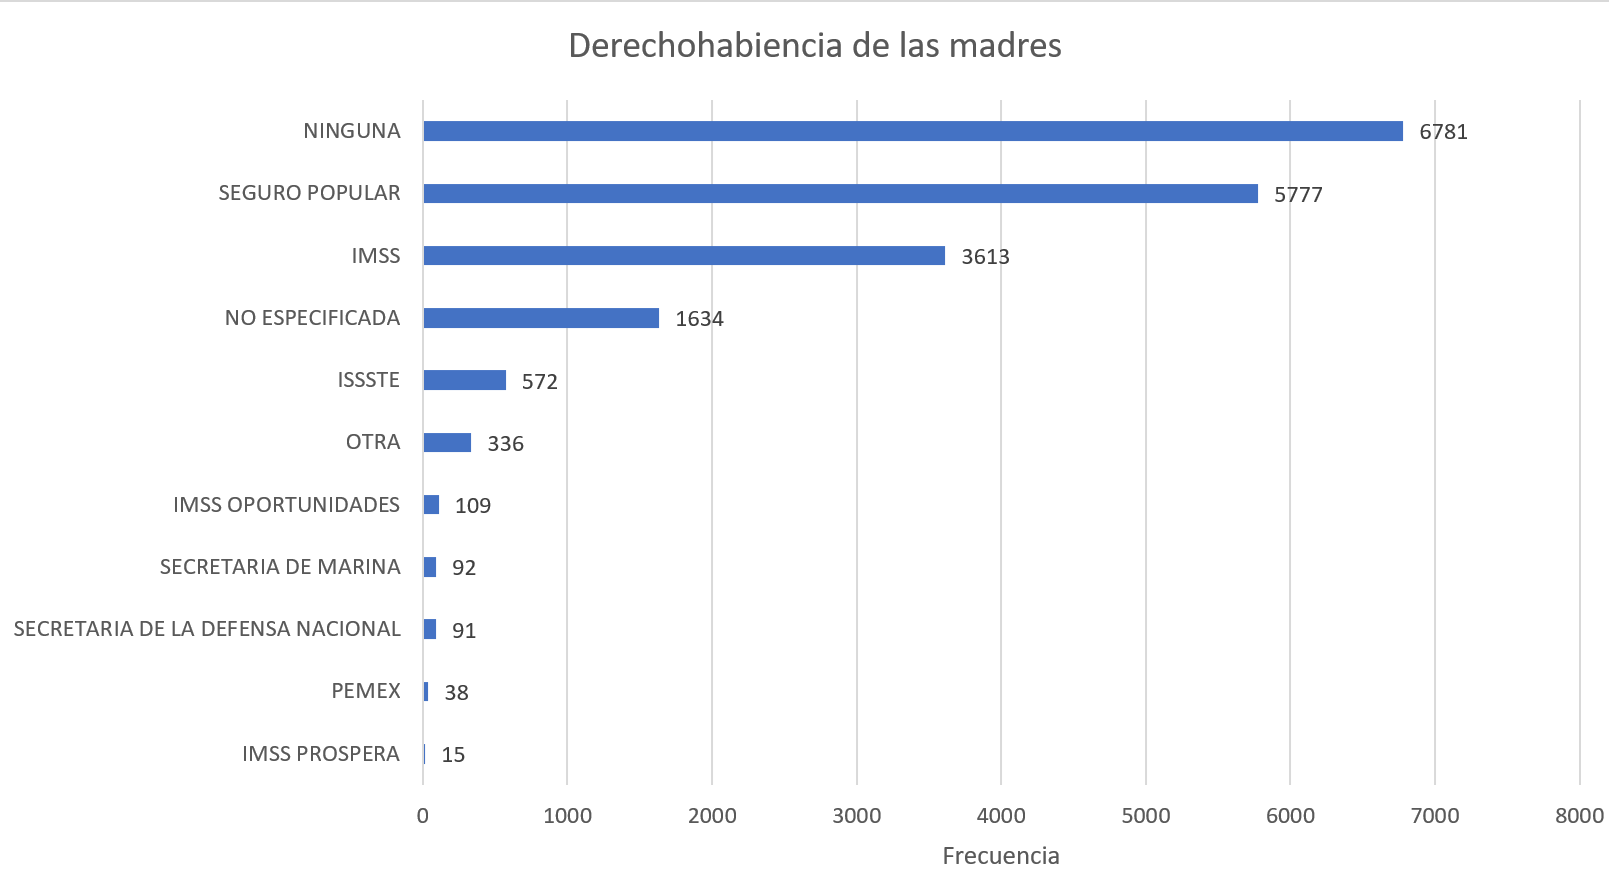

In [40]:
# Conteo según el sitio donde ocurrio la defunción
data.descripción_del_sitio_donde_ocurrio_la_defunción.value_counts()

SECRETARIA DE SALUD                  7292
IMSS                                 2661
OTRA UNIDAD PUBLICA                  2648
HOGAR                                2518
UNIDAD MEDICA PRIVADA                1765
OTRO LUGAR                            550
SE IGNORA                             444
IMSS OPORTUNIDADES                    376
VIA PUBLICA                           358
ISSSTE                                336
SECRETARIA DE LA DEFENSA NACIONAL      55
SECRETARIA DE MARINA                   34
PEMEX                                  21
Name: descripción_del_sitio_donde_ocurrio_la_defunción, dtype: int64

In [41]:
data.groupby('descripción_del_sitio_donde_ocurrio_la_defunción').descripción_de_la_asistencia_médica.value_counts()

descripción_del_sitio_donde_ocurrio_la_defunción  descripción_de_la_asistencia_médica
HOGAR                                             CON ATENCION MEDICA                    1178
                                                  SIN ATENCION MEDICA                    1137
                                                  NO ESPECIFICADO                         203
IMSS                                              CON ATENCION MEDICA                    2578
                                                  NO ESPECIFICADO                          61
                                                  SIN ATENCION MEDICA                      22
IMSS OPORTUNIDADES                                CON ATENCION MEDICA                     358
                                                  NO ESPECIFICADO                           9
                                                  SIN ATENCION MEDICA                       9
ISSSTE                                            CON ATENCION MEDIC

In [38]:
# Conteo de la asistencia recibida
data.descripción_de_la_causa_cie.value_counts(normalize=True)

O150  ECLAMPSIA EN EL EMBARAZO                                                                                   0.084164
O141  PREECLAMPSIA SEVERA                                                                                        0.071781
O721  OTRAS HEMORRAGIAS POSTPARTO INMEDIATAS                                                                     0.066954
O720  HEMORRAGIA DEL TERCER PERÍODO DEL PARTO                                                                    0.060867
O998  OTRAS ENFERMEDADES ESPECIFICADAS Y AFECCIONES QUE COMPLICAN EL EMBARAZO, EL PARTO Y EL PUERPERIO           0.057823
                                                                                                                   ...   
O048  ABORTO MÉDICO COMPLETO O NO ESPECIFICADO, CON OTRAS COMPLICACIONES ESPECIFICADAS Y LAS NO ESPECIFICADAS    0.000052
O041  ABORTO MÉDICO INCOMPLETO, COMPLICADO POR HEMORRAGIA EXCESIVA O TARDÍA                                      0.000052
O059  OTRO ABORTO COMPLE

**Como podemos observar, las principales causas de muerte materna son la eclamsia, preeclampsia y hemorragias.** 

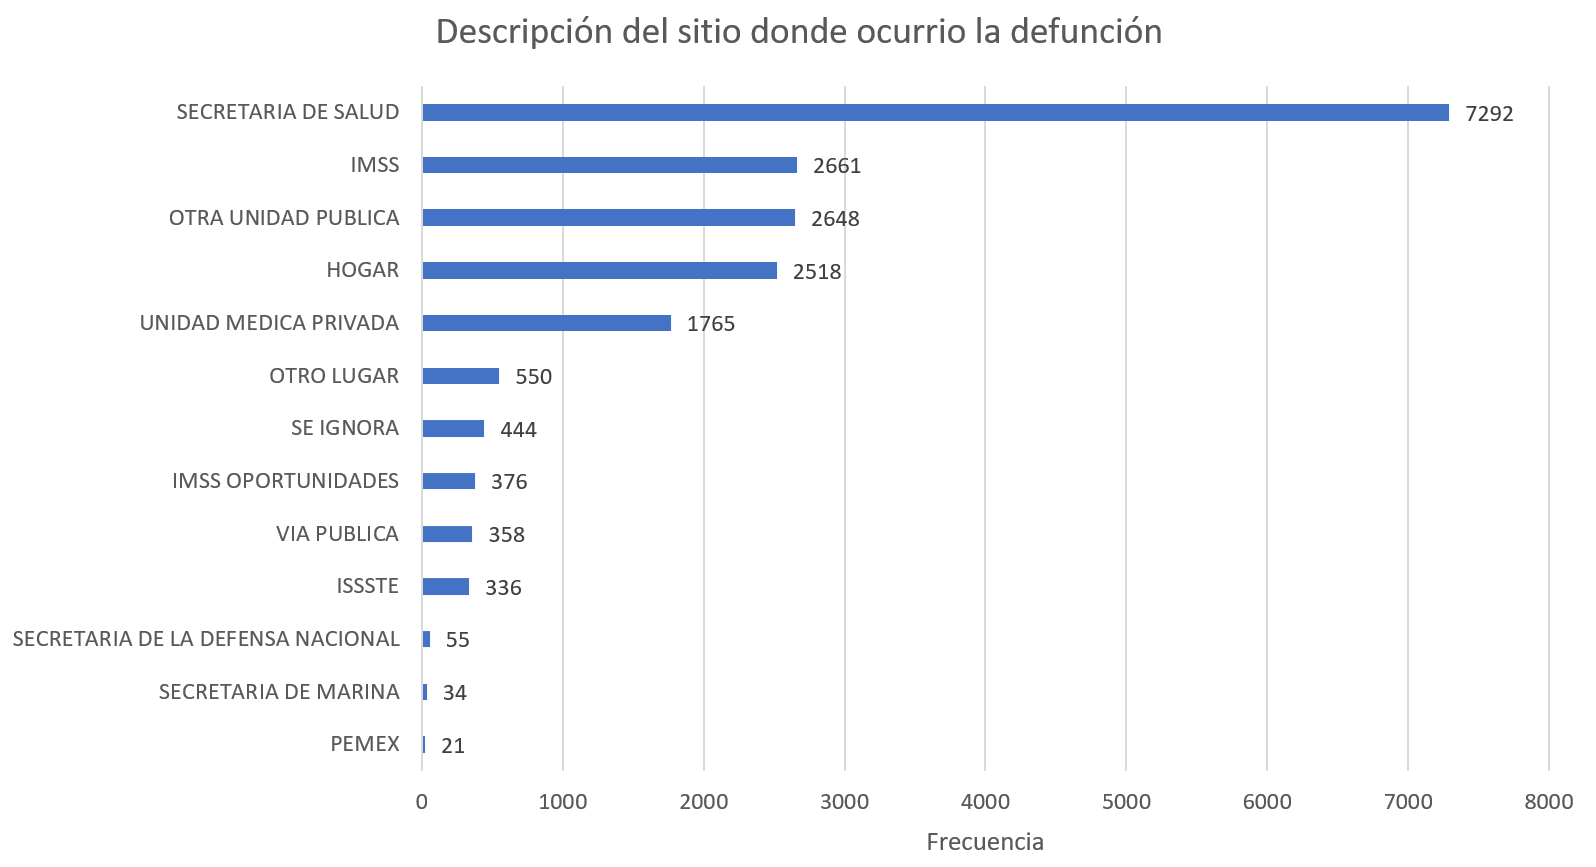

Analizando las muertes en el estado de Chiapas, podemos observar que el lugar donde ocurrió la defunción, el hogar ocupa un sitio con gran frecuencia de ocurrencia.


In [52]:
data[data.descripción_de_la_entidad_de_ocurrencia == 'CHIAPAS'].descripción_del_sitio_donde_ocurrio_la_defunción.value_counts()

SECRETARIA DE SALUD                  537
HOGAR                                335
OTRA UNIDAD PUBLICA                   93
IMSS                                  76
SE IGNORA                             70
IMSS OPORTUNIDADES                    58
UNIDAD MEDICA PRIVADA                 45
OTRO LUGAR                            45
VIA PUBLICA                           33
ISSSTE                                12
SECRETARIA DE LA DEFENSA NACIONAL      5
SECRETARIA DE MARINA                   3
Name: descripción_del_sitio_donde_ocurrio_la_defunción, dtype: int64

# Conclusiones
Analizando los datos pudimos observar el comportamiento de los casos de muerte materna presentadas en el periodo de 2002 a 2018 en México.

Pudimos responder a las preguntas planteadas inicialmente, destacando que en los estados de México, Chiapas, Veracruz y la Ciudad de México son los estados donde más se presentan este tipo de casos.

Respecto al estado de Chiapas podemos observar que además de ser uno de los estados con más casos presentados, el sítio donde ocurren es en los hogares, podemos comentar que al presentarse casos en los que se presenta riesgo de vida de la madre, por alguna razón no se llega a tiempo a los servicios de salud en Chiapas. Se podría realizar una campaña para evitar o reducir ese tipo de riesgo.

## Referencias
Los datos se obtuvieron de [datos.gob Muertes maternas](https://datos.gob.mx/busca/dataset/mortalidad-materna)